## ARIMA model (p,i,q)
- the **AIC** (Akaike Information Criterion) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.
- **the lower the AIC the better**
- but if AIC of different model approx. the same **choose the simpler model**

In [42]:
alc.index = pd.DatetimeIndex(alc.index.values,
                               freq=alc.index.inferred_freq)

In [61]:
# The (p,d,q) order of the model for the autoregressive, differences, and moving average components.
from statsmodels.tsa.arima.model import ARIMA 
arima = ARIMA(alc['linearized'], order=(2,1,3))
res = arima.fit(method='statespace')
res.summary()

/home/mz/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                  360
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 991.930
Date:                Fri, 04 Mar 2022   AIC                          -1971.860
Time:                        14:35:11   BIC                          -1948.560
Sample:                    01-01-1992   HQIC                         -1962.594
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8034      0.355      2.262      0.024       0.107       1.500
ar.L2          0.1081      0.267      0.404      0.686      -0.416       0.632
ma.L1         -1.2113      0.361     -3.356      0.001      -1.919      -0.504
ma.L2          0.5085      0.407      1.249      0.212      -0.290       1.307
ma.L3         -0.1723      0.163     -1.058      0.290      -0.491       0.147
sigma2         0.0002   5.93e-06     39.231      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              9512.45
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             2.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Gridsearch for Hyperparameters

In [44]:
import pmdarima as pm
smodel = pm.auto_arima(alc['linearized'],
                start_p=1, max_p=2,
                start_q=1, max_q=2,
                seasonal=False,
                trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1990.809, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1913.590, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1993.180, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1978.279, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1900.508, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1991.260, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1989.195, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1958.492, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.607 seconds


In [198]:
# The (p,d,q) order of the model for the autoregressive, differences, and moving average components.
arima2 = ARIMA(alc['linearized'], order=(1,1,0))
arima2_fit = arima2.fit(method='statespace')
arima2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                  360
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 981.246
Date:                Fri, 04 Mar 2022   AIC                          -1958.492
Time:                        17:55:48   BIC                          -1950.725
Sample:                    01-01-1992   HQIC                         -1955.403
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3914      0.035    -11.028      0.000      -0.461      -0.322
sigma2         0.0002   5.04e-06     49.084      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):             11140.93
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting - out of sample

### point predictions

In [199]:
# one-step out-of sample forecast - next value in Series
arima2_fit.forecast()

2022-01-01    8.692202
Freq: MS, dtype: float64

In [200]:
# forecast for the next 10 months
arima2_fit.forecast(steps=10)

2022-01-01    8.692202
2022-02-01    8.692584
2022-03-01    8.692435
2022-04-01    8.692493
2022-05-01    8.692470
2022-06-01    8.692479
2022-07-01    8.692476
2022-08-01    8.692477
2022-09-01    8.692476
2022-10-01    8.692477
Freq: MS, Name: predicted_mean, dtype: float64

### full results including prediction intervals

In [249]:
forecast = arima2_fit.get_forecast(10)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

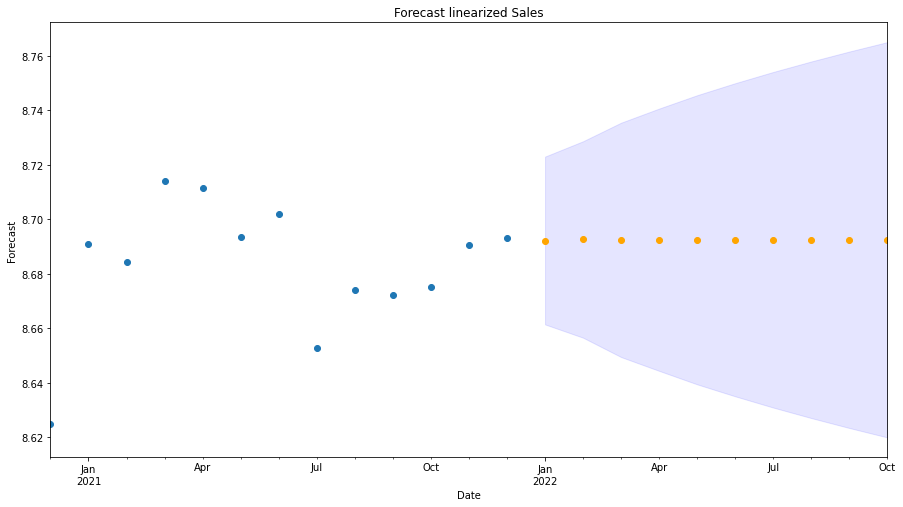

In [246]:
fig, ax = plt.subplots(figsize=(15,8));
ax.set(title='Forecast linearized Sales', xlabel='Date', ylabel='Forecast');
alc.loc['2020-12-01':, 'linearized'].plot(ax=ax, style='o', label='Observed');
yhat.plot(style='o', color='orange');
ax.fill_between(yhat_conf_int.index, yhat_conf_int.iloc[:,0], yhat_conf_int.iloc[:,1], color='b', alpha=0.1);

## Prediction 
in-sample prediction and out-of-sample forecasting

###  Point-prediction - w/o confidence intervals

In [351]:
# point prediction - in and out of sample (no confidence intervals)
# start = where forecasting starts
# end = last forecast
prediction = arima2_fit.predict(start = '2020-01-01', end='2022-04-01')

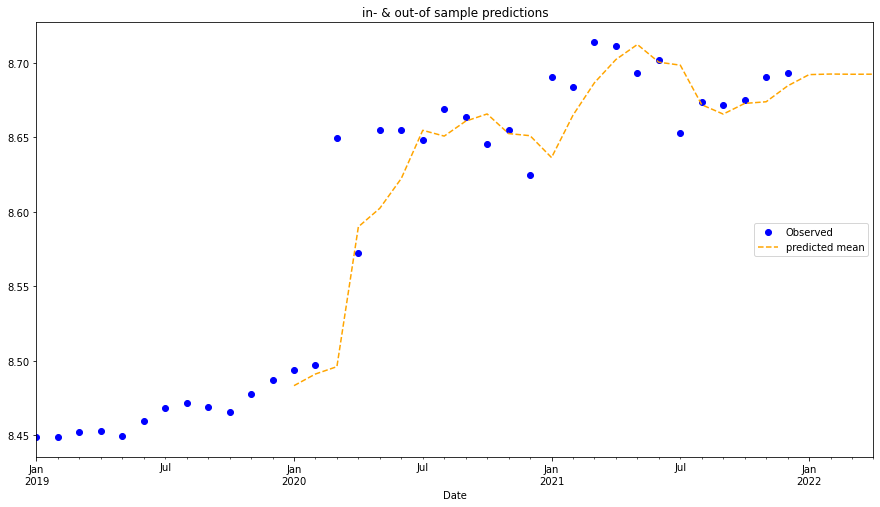

In [349]:
fig, ax = plt.subplots(figsize=(15,8));
ax.set(title='in- & out-of sample predictions', xlabel='Date');
alc.loc['2019-01-01':, 'linearized'].plot(ax=ax, style='o', color='b', label='Observed');
prediction.plot(style='--', color='orange', label='predicted mean');
plt.legend(loc="right");
#ax.fill_between(yhat_conf_int.index, yhat_conf_int.iloc[:,0], yhat_conf_int.iloc[:,1], color='b', alpha=0.1);

### confidence intervals

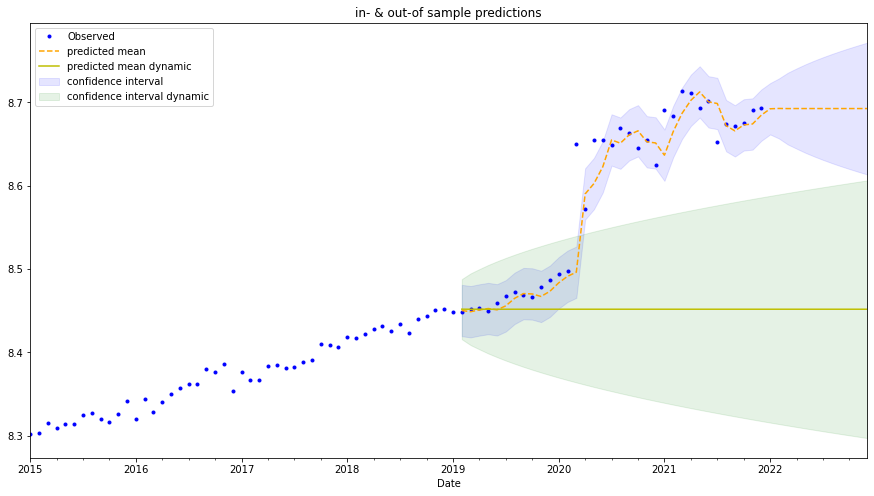

In [369]:
# In-sample one-step-ahead predictions
prediction_get = arima2_fit.get_prediction(start= "2019-01-01", end="2022-12-01")
mean = prediction_get.predicted_mean[1:]
# lower and upper bound confidence interval
ci = prediction_get.conf_int()
low = predict_ci[1: ]["lower linearized"]
up = predict_ci[1:]["upper linearized"]

# dynamic: from the starting value forecasted endogenous values will be used  for the predictions
prediction_dy = arima2_fit.get_prediction(start= "2019-01-01", end="2022-12-01", dynamic=True)
ci_dy = prediction_dy.conf_int()
mean_dy = prediction_dy.predicted_mean[1:]
low_dy = ci_dy[1: ]["lower linearized"]
up_dy = ci_dy[1:]["upper linearized"]


fig, ax = plt.subplots(figsize=(15,8));
ax.set(title='in- & out-of sample predictions', xlabel='Date');
alc.loc['2015-01-01': , 'linearized'].plot(ax=ax, style='.', color='b', label='Observed');
pred_mean.plot(style='--', color='orange', label='predicted mean');
mean_dy.plot(style='-', color='y', label='predicted mean dynamic');

ax.fill_between(pred_mean.index, low, up, color='b', alpha=0.1, label="confidence interval");
ax.fill_between(pred_mean.index, low_dy, up_dy, color='g', alpha=0.1, label="confidence interval dynamic");

plt.legend(loc=2);

## Forecast with Train-Test-Split 

In [121]:
train_size = 0.7
index = round(train_size*alc.shape[0])
alc_train = alc.iloc[:index]
alc_test = alc.iloc[index:]

,Sales,Sales_inter,deseasonalized,linearized
2013-01-01,3742.0,3742.0,3749.546829,8.229390
2013-02-01,3788.0,3788.0,3788.902205,8.239832
2013-03-01,3765.0,3765.0,3750.103014,8.229539
2013-04-01,3757.0,3757.0,3758.033354,8.231651
2013-05-01,3787.0,3787.0,3779.580853,8.237368
...,...,...,...,...
2021-08-01,5854.0,5854.0,5848.672578,8.673970
2021-09-01,5839.0,5839.0,5837.889976,8.672125
2021-10-01,5846.0,5846.0,5855.552445,8.675146
2021-11-01,5936.0,5936.0,5947.270402,8.690688


In [352]:
import pmdarima as pm
smodel = pm.auto_arima(alc_train['linearized'],
                start_p=1, max_p=2,
                start_q=1, max_q=2,
                seasonal=False,
                trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1478.815, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1448.290, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1479.647, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1481.095, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1436.079, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1480.555, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1478.178, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1452.216, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.752 seconds


In [354]:
from statsmodels.tsa.arima.model import ARIMA 
arima_train = ARIMA(alc_train['linearized'], order=(0,1,1))
arima_train_fit = arima_train.fit(method='statespace')
arima_train_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                  252
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 728.108
Date:                Sat, 05 Mar 2022   AIC                          -1452.216
Time:                        14:23:25   BIC                          -1445.166
Sample:                    01-01-1992   HQIC                         -1449.379
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2454      0.053     -4.610      0.000      -0.350      -0.141
sigma2         0.0002   1.33e-05     13.254      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   5.18   Jarque-Bera (JB):                20.57
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.16
Prob(H) (two-sided):                  0.70   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [401]:
forecast_train = arima_train_fit.get_forecast(steps = len(alc_test), alpha=0.5, dynamic=False)

In [402]:
ci_train = forecast_train.conf_int()
ci_train.head()

,lower linearized,upper linearized
2013-01-01,8.224824,8.276947
2013-02-01,8.218236,8.283535
2013-03-01,8.212771,8.289000
2013-04-01,8.207996,8.293775
2013-05-01,8.203702,8.298069


In [403]:
mean_train = forecast_train.predicted_mean

In [404]:
mean_train

2013-01-01    8.250886
2013-02-01    8.250886
2013-03-01    8.250886
2013-04-01    8.250886
2013-05-01    8.250886
                ...   
2021-08-01    8.250886
2021-09-01    8.250886
2021-10-01    8.250886
2021-11-01    8.250886
2021-12-01    8.250886
Freq: MS, Name: predicted_mean, Length: 108, dtype: float64

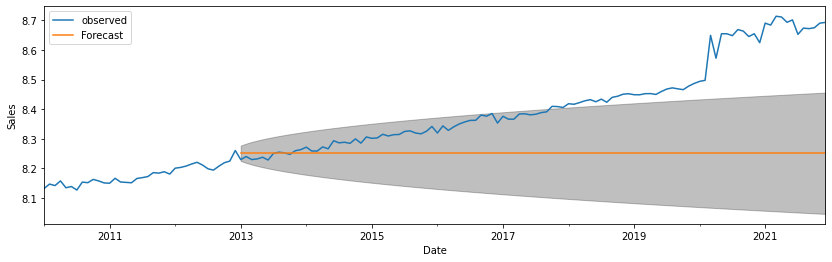

In [405]:
ax = alc.linearized["2010-01-01":].plot(label='observed', figsize=(14, 4))
mean_train.plot(ax=ax, label='Forecast')
ax.fill_between(ci_train.index,
                ci_train.iloc[:, 0],
                ci_train.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

## Re-compose back to initial time series
This wasn't our original time series!</br>
This is the linearized version, we extracted the seasonal and exponential components.

In [415]:
reconstructed = np.exp(mean_train)*alc_result_mult.seasonal[index:]
reconstructed

2013-01-01    3823.306344
2013-02-01    3830.104918
2013-03-01    3846.235562
2013-04-01    3829.963729
2013-05-01    3838.537266
                 ...     
2021-08-01    3834.506738
2021-09-01    3831.745586
2021-10-01    3824.767428
2021-11-01    3823.757165
2021-12-01    3814.251421
Freq: MS, Length: 108, dtype: float64

In [417]:
lower_recons = np.exp(ci_train).iloc[:,0]*result_mul.seasonal[index:]
upper_recons = np.exp(ci_train).iloc[:,1]*result_mul.seasonal[index:]

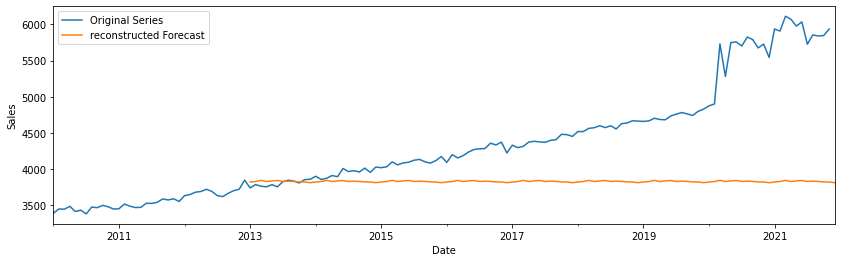

In [424]:
ax = alc.Sales["2010-01-01":].plot(label='Original Series', figsize=(14, 4))
reconstructed.plot(ax=ax, label='reconstructed Forecast')
ax.fill_between(alc_test.index, lower_recons, upper_recons, color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

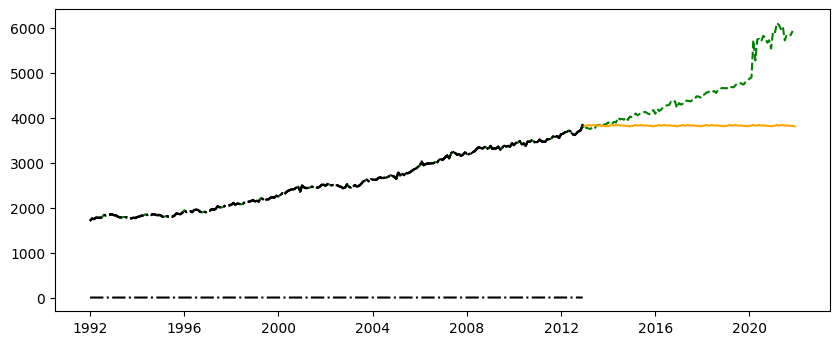

In [438]:
fc_series = pd.Series(reconstructed, index=alc_test.index)
# Plot
plt.figure(figsize=(10,4), dpi=100)
plt.plot(alc.Sales, label='actual', color='g', ls='--')
plt.plot(alc_train, label='training', color='black', ls='-.')
plt.plot(fc_series, label='forecast', color='orange')

In [ ]:


plt.plot(fc_series, label='forecast', color='orange')
if is_confidence_int:
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8);

In [435]:
alc.Sales

1992-01-01    1713.0
1992-02-01    1763.0
1992-03-01    1753.0
1992-04-01    1784.0
1992-05-01    1783.0
               ...  
2021-08-01    5854.0
2021-09-01    5839.0
2021-10-01    5846.0
2021-11-01    5936.0
2021-12-01       NaN
Freq: MS, Name: Sales, Length: 360, dtype: float64